In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import platform

pd.set_option('display.float_format',"{:.2f}".format)

# OS에 따라 다른 폰트 지정
if platform.system() == 'Darwin':   # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':  # Windows
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:  # Linux (예: Colab, Ubuntu)
    plt.rcParams['font.family'] = 'NanumGothic'

In [345]:
# folder_path = "hm_dataset" #########--------------------- 자기 경로로 수정하기!
article_df = pd.read_csv("articles_hm.csv")
customer_df = pd.read_csv("customer_hm.csv")
transaction_df = pd.read_csv("transactions_hm.csv")

In [346]:
whole_df = pd.merge(
    pd.merge(
        transaction_df,
        customer_df,
        on = 'customer_id'
    ),
    article_df,
    on ='article_id'
)
df = whole_df[['t_dat','customer_id','Active','age','section_no','section_name','index_group_no','index_group_name','product_type_no','product_type_name','price']].copy()
df['price'] = df['price']*1000
sample_df = df.sample(200)

In [347]:
price_data = df['price']

In [348]:
df.head().T

,0,1,2,3,4
t_dat,2019-11-05,2019-05-22,2019-05-10,2019-08-26,2019-08-10
customer_id,3e2b60b679e62fb49516105b975560082922011dd752ec...,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,3b77905de8b32045f08cedb79200cdfa477e9562429a39...
Active,1,0,1,0,0
age,51,28,37,19,35
section_no,53,6,21,65,26
section_name,Divided Collection,Womens Casual,Contemporary Casual,Womens Big accessories,Men Underwear
index_group_no,2,1,3,1,3
index_group_name,Divided,Ladieswear,Menswear,Ladieswear,Menswear
product_type_no,252,254,274,66,302
product_type_name,Sweater,Top,Shorts,Bag,Socks


### 가설검정 순서
1. 가설 설정 
    - 귀무가설(H0) : 대립가설의 반대 / 보통 차이가 없다 같은 내용을 담음. 
    - 대립가설(H1) : 밝히고자 하는 가설 (유의미하다 / 차이가 있다)
2. 검정 방법 선택
3. 유의수준 결정
4. 검정통계량과 p-value
5. 결론/결과해석
    - p-value < 유의 수준 : 귀무가설 기각 / 대립가설 채택
    - p-value >= 유의 수준 : 귀무가설 채택/ 대립가설 기각

## 1. 단일 표본일 때 


- 전제 조건 : 정규성
    - 정규성을 만족하면, 단일 표본 t-검정
    - 정규성을 불만족하면, 윌콕슨 부호 검정

1. 가설 설정
- 대립가설 : 드레스를 구입하는 고객들의 평균 가격은 75보다 높다. 
- 귀무가설 : 드레스를 구입하는 고객들의 평균 가격은 75 이하이다.  
2. 검정방법 선택
- 정규성 검정
    - 그림 : 히스토그램/ qq-plot 
    - 통계검정 : K-S
3. 유의 수준 결정
4. 검정통계량과 p-value
5. 결과해석

In [349]:
dress_df = df.loc[df['product_type_name']=='Dress']
cust_dress_price = dress_df.groupby('customer_id')['price'].mean()
cust_dress_price

customer_id
0000f1c71aafe5963c3d195cf273f7bfd50bbf17761c9199e53dbb81641becd7    53.89
000197360fe727d2cc0887073db9062bf37a8949a95c4a63db58661d94d2cb06   118.63
0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94    48.57
00023e3dd8618bc63ccad995a5ac62e21177338d642d66b42e0038c6b10f655a    28.80
00058c11019467570a6918669b768392f7c9277b7ae4d853bab9cd25f1eae6b4    22.02
                                                                    ...  
c88a25760a67edb28e28c0770443531d947e765a8d653b675ffce9c15b69103f    33.90
c88c0bbdc2fb0b9c7f2aee3ab2241519ec841cc2ed69afdb43cc9ce82b4f1b11    19.47
c88e0d9b0f9a3d2687cdb6030732bc96f6a4b5fc9c62a8b321272b4adc1baefe    23.71
c88e5978f62448cecdb549b80f8c0d6fe940a81bd0a3c8696bdcd30f6c691b28    25.41
c88f5971612e659a4e90d6f08d9c29bdf1e4268fcf52d56ff8c53e2c24157209    16.39
Name: price, Length: 63562, dtype: float64

Text(0.5, 1.0, 'Q-Q Plo')

d:\sonamu\campstudy_Python\.venv\Lib\site-packages\IPython\core\events.py:96: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
d:\sonamu\campstudy_Python\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


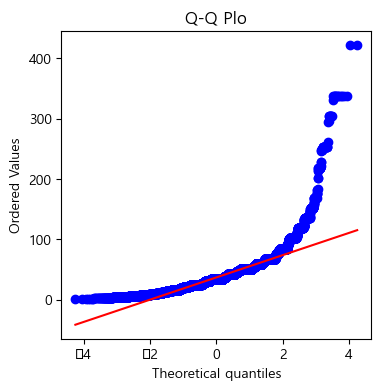

In [350]:
#### # 정규성 검정 1. Q-Q Plot

plt.figure(figsize=(4,4))
stats.probplot(cust_dress_price, plot=plt)
plt.title("Q-Q Plo")

In [351]:
# 정규성 검정 2. Kolmogorov-Sminov

# 표본의 평균
sample_mean = np.mean(cust_dress_price)
# 표본의 표준편차 
s = np.std(cust_dress_price,ddof=1)

stat, p = stats.kstest(cust_dress_price, 'norm', args=(sample_mean, s))

stat, p

(np.float64(0.13629432021202031), np.float64(0.0))

- p >= 0.05 : 정규성을 만족한다. 
- p < 0.05 : 정규성 불만족


3. 유의 수준 : 0.05

In [352]:
standard = 75

w_stat, w_p = stats.wilcoxon(cust_dress_price - standard, alternative="greater", zero_method="wilcox")
w_stat, w_p

(np.float64(33337671.5), np.float64(1.0))

p-value가 무지무지무지 크다~

결론 : 귀무 가설 채택 
=> 드레스를 구매한 고객들의 가격 평균은 75이하이다

단일표본t검정 끝~

아주 만약에, 정규성을 만족했다면? => 단일 표본 t-검정

In [353]:
# 단일 표본 t-검정: stats.ttest_1samp

t_stat, p_value = stats.ttest_1samp(cust_dress_price, popmean = 75, alternative="greater") #two-sided : 75가 아니다(양측검정) , less: 75보다 작다 
t_stat, p_value #검정통계량과 p-value 보고 이제 결과를~~

(np.float64(-473.11913984462046), np.float64(1.0))

분석가는 설계자여 

어려운 건 python이 혀

어떨 때 어떤 게 나오고 이럴 땐 이걸 쓰고

이런 걸 생각할 줄 아는 게 중요한겨

다음에는 뭘 배우나요??

- t검정 말고 다른 검정, 상관분석과 상관계수 등등
- 범주형 (ㅇㅎㅇㅎ 카이제곱)

## 2. 서로 다른 표본의 비교

-H&M 데이터로 검정하고싶은거있었는데 주목받기싫어서말못하는사람여기묻히다-

- count는 고유
- ununiq는 고유한..

1. 가설 설정하기
- 대립가설 : Active 고객의 구매 횟수가 Inactive 고객의 구매횟수보다 크다. 
- 귀무가설 : Active 고객의 구매 횟수가 Inactive 고객의 구매횟수보다 작거나 같다. 

In [354]:
customer_cnt_df = df.groupby(['customer_id','Active'])['section_no'].count().reset_index()
customer_cnt_df = customer_cnt_df.rename(columns={'section_no':'cnt'})

In [355]:
active_df = customer_cnt_df.loc[customer_cnt_df['Active']==1]
inactive_df = customer_cnt_df.loc[customer_cnt_df['Active']==0]

In [356]:
active_df.head()        # 얘들은 표본이라서

,customer_id,Active,cnt
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,1,7
4,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,1,5
5,0000ae1bbb25e04bdc7e35f718e852adfb3fbb72ef38b3...,1,1
6,0000f1c71aafe5963c3d195cf273f7bfd50bbf17761c91...,1,8
13,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,1,20


In [357]:
inactive_df.head()        # 얘들은 표본이라서

,customer_id,Active,cnt
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0,2
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0,6
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,0,1
7,0001076e215991bad544dd3e7312f78d9f576a1cc3ddc4...,0,1
8,00015c1a121e08bbd2552c15fbbb6e6b19d3bf8f7b6a3d...,0,1


In [358]:
# 걍 평균과 평균을 구해서 비교해서 모집단을 대변한다고 ㅎ ㅏㄹ 수ㄱ ㅏ없음
# 그래서 통계 검정을 하는 것. 근거를 계속 찾고 p-value를 봐서 유의미한지 판단하는 것임 ㅇㅇ

In [359]:
# 두 그룹의 표본의 크기 맞추기 
active_group = active_df.sample(n = 100000, random_state=42)['cnt']
inactive_group = inactive_df.sample(n = 100000, random_state=42)['cnt']

In [360]:
active_group

16063      1
340485    11
102449     8
253178     3
330173     1
          ..
205670     1
338133     2
156407     4
268205     1
195316     2
Name: cnt, Length: 100000, dtype: int64

2. 검정방법 선택 : 독립 표본 
-  후보1. 독립 표본 t- 검정
    - 정규성 
        - Q-Q Plot
        - K-S test
    - 등분산성
        - Levene's Test


d:\sonamu\campstudy_Python\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


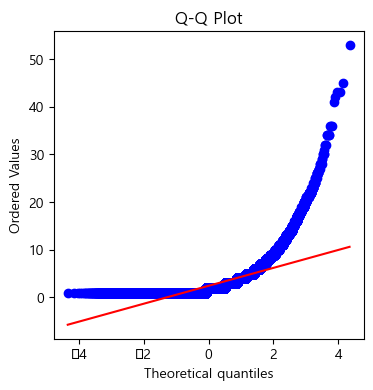

In [361]:
# 정규성 검정 1. Q-Q Plot

plt.figure(figsize=(4,4))
stats.probplot(active_group, plot=plt)
plt.title("Q-Q Plot")
plt.show()

아이고.. 너무 기울어졌네
정규성이 너무 만족을 안하는데

- 기울어져있고
- 이상치
- 헤비테일
- 비대칭
안되는 이유가 ㅓㄴ무 많군.....
정규성 만족 못하니까? 바로 맨 휘트니 유 금정씨 ㄱㄱ
.....하기 전에! 


당연하지만 적어
- 그룹 집단 별로(독립집단 별로)

t-test 가능할까요? 
> 못해요...
> heavy_tail , 비대칭, 이상치.. 그냥 3종 세트

정규성 만족하지 않는다 

In [362]:
# 정규성 검정 2. Kolmogorov-Sminov

# 표본의 평균
sample_mean = np.mean(active_group)
# 표본의 표준편차 
s = np.std(active_group,ddof=1)

stat, p = stats.kstest(active_group, 'norm', args=(sample_mean, s))

stat, p

(np.float64(0.2706048832805266), np.float64(0.0))

In [363]:
# 정규성 검정 2. Kolmogorov-Sminov

# 표본의 평균
sample_mean = np.mean(inactive_group)
# 표본의 표준편차 
s = np.std(inactive_group,ddof=1)

stat, p = stats.kstest(inactive_group, 'norm', args=(sample_mean, s))

stat, p

(np.float64(0.277740178901084), np.float64(0.0))

2. 검정방법 선택 > Mann-Whitney U 검정


3. 유의 수준 결정 :0.05

4. 검정 통계량, p-value계산

In [364]:
u_stat, u_p = stats.mannwhitneyu(active_group, inactive_group, alternative="greater")
u_stat, u_p

(np.float64(5289659804.0), np.float64(2.859994636357784e-128))

In [365]:
# e-128 : 0 이 한 128개쯤 있음 
#  2.859994636357784e-128 = 0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000085994

In [366]:
# 유의수준보다 작음!!! 이자식 검거
# H1 채택, H0 기각

5. 결과 해석하기
- p_value < 유의수준 : 귀무가설 기각 / 대립가설 채택
- => active_group 이 inactive_group 보다 구매횟수가 크다 


--------------------------------------------------------------------------------
만약에 정규성을 만족했다면? 

등분산성을 확인

In [367]:
# 등분산성 검정: Levene 검정
stat, p = stats.levene(active_group, inactive_group)
stat, p

(np.float64(384.08990971745595), np.float64(1.9272459830535923e-85))

p-value가 0.05보다 한참 작다  => 등분산 가정 불만족

정규성은 만족하지만 등분산 가정을 불만족할 때, 검정방법 : Welch T-test

In [368]:
t_stat, p_value = stats.ttest_ind(active_group, inactive_group, equal_var = False) 
# equal_var = False : 등분산 가정을 만족하지 못할 때 => Welch t-test
# equal_var = True : 등분산 가정 만족 => 독립표본 t-test

t_stat, p_value

(np.float64(24.259979995679092), np.float64(8.077760405884337e-130))

p_value가 0.05보다 작다. 그것도 매우...  => 귀무가설 기각/대립가설 채택 => active_group이 inactive_group보다 구매횟수가 크다 

In [369]:
### 3. 두 평균 비교 : **동일한 집단의 전후 비교** 혹은 독립적이지 않은 두쌍의 집단 비교

- 프로모션 기간 : 2019-11-01 ~ 2019-11-30
- 프로모션 전 한 달 : 2019-10-01 ~ 2019-10-31

- 프로모션 기간과 프로모션 이전 한 달의 고객의 구매한 가격의 평균을 비교해보자. 
-> 비교할 대상 : 두 기간 다 구매한 고객 

1. 가설 설정하기
- 귀무가설(H0): 프로모션 이전 한 달보다 프로모션 기간의 고객의 평균 구매가격이 같거나 낮다. 
    - (price_before >= price_prm)
- 대립가설(H1): 프로모션 전 한달동안 보다 프로모션 기간에 고객 구매 가격이 높다  
    - (price_before < price_prm)

2. 검정 방법 선택하기 
- 후보1. 대응표본 t-test
    - 정규성
     - qq plot
     - K-S test

In [370]:
df_prm = df.loc[df['t_dat'].between('2019-11-01','2019-11-30')]
df_before = df.loc[df['t_dat'].between('2019-10-01','2019-10-31')]

In [371]:
# 두 번 다 구매한 고객 
cust_common = np.intersect1d(df_prm['customer_id'],df_before['customer_id'])
cust_common

array(['00061a04f030bdf3665b09829192ca8c13c4de6dd9ae9d38d0d0b5ce3a1cfc6f',
       '000ab6e1f39b83d936d5855c412d9695f40331c3e9d632d70f6e823ff7aa2b16',
       '001143bec624de9df82bd687babb382e00b0285e2371cc9120de5d42c48f1076',
       ...,
       'c877bdf754fd815d8d471c82c6e3aa44f31cffee8648456859cba33cc1a5a861',
       'c88057ce9c0c9ddba7e125802e3ece063d33377ba1c968ab1cf3ccae8d06b3e3',
       'c88822608b1824dd3968482dad8c98762d54237a96681a1e2bdc77383f84b8bf'],
      shape=(6193,), dtype=object)

In [372]:
df_prm_cust = df_prm.loc[df_prm['customer_id'].isin(cust_common)]
df_before_cust = df_before.loc[df_before['customer_id'].isin(cust_common)]

In [373]:
prm_cust_price = df_prm_cust.groupby('customer_id')['price'].mean()
before_cust_price = df_before_cust.groupby('customer_id')['price'].mean()

In [374]:
prm_cust_price

customer_id
00061a04f030bdf3665b09829192ca8c13c4de6dd9ae9d38d0d0b5ce3a1cfc6f   59.31
000ab6e1f39b83d936d5855c412d9695f40331c3e9d632d70f6e823ff7aa2b16   41.51
001143bec624de9df82bd687babb382e00b0285e2371cc9120de5d42c48f1076    6.76
00125440be6cd148c3599b9c5a2d55f5838c1b0257d35643038c38a60c691fe8   36.36
00357b192b81fc83261a45be87f5f3d59112db7d117513c1e908e6a7021edc35   40.66
                                                                    ... 
c87594769ce7610413bbc8720f613981badd57c6e247e11d0697343d16e090eb   16.93
c877689ff8e642ad4d6cc342cf4791ddf1c31032e3164a0ef2e47f11c1ff3232   33.88
c877bdf754fd815d8d471c82c6e3aa44f31cffee8648456859cba33cc1a5a861   84.73
c88057ce9c0c9ddba7e125802e3ece063d33377ba1c968ab1cf3ccae8d06b3e3   17.95
c88822608b1824dd3968482dad8c98762d54237a96681a1e2bdc77383f84b8bf   31.42
Name: price, Length: 6193, dtype: float64

In [375]:
before_cust_price

customer_id
00061a04f030bdf3665b09829192ca8c13c4de6dd9ae9d38d0d0b5ce3a1cfc6f   30.49
000ab6e1f39b83d936d5855c412d9695f40331c3e9d632d70f6e823ff7aa2b16   24.71
001143bec624de9df82bd687babb382e00b0285e2371cc9120de5d42c48f1076    6.76
00125440be6cd148c3599b9c5a2d55f5838c1b0257d35643038c38a60c691fe8   28.49
00357b192b81fc83261a45be87f5f3d59112db7d117513c1e908e6a7021edc35   32.19
                                                                    ... 
c87594769ce7610413bbc8720f613981badd57c6e247e11d0697343d16e090eb    8.46
c877689ff8e642ad4d6cc342cf4791ddf1c31032e3164a0ef2e47f11c1ff3232   29.64
c877bdf754fd815d8d471c82c6e3aa44f31cffee8648456859cba33cc1a5a861   11.71
c88057ce9c0c9ddba7e125802e3ece063d33377ba1c968ab1cf3ccae8d06b3e3   15.24
c88822608b1824dd3968482dad8c98762d54237a96681a1e2bdc77383f84b8bf   67.78
Name: price, Length: 6193, dtype: float64

In [376]:
diff = prm_cust_price - before_cust_price

d:\sonamu\campstudy_Python\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


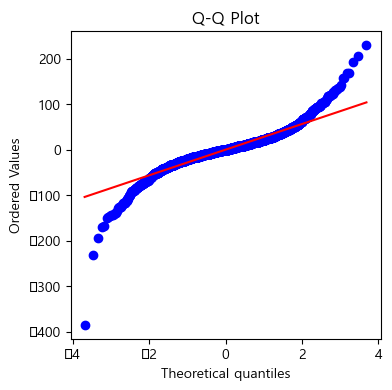

In [377]:
# 정규성 검정 1. Q-Q Plot

plt.figure(figsize=(4,4))
stats.probplot(diff, plot=plt)
plt.title("Q-Q Plot")
plt.show()

In [378]:
# 정규성 검정 2. Kolmogorov-Sminov

# 표본의 평균
sample_mean = np.mean(diff)
# 표본의 표준편차 
s = np.std(diff,ddof=1)

stat, p = stats.kstest(diff, 'norm', args=(sample_mean, s))

stat, p

(np.float64(0.0853751951997257), np.float64(1.0128358467844676e-39))

불만족허네요

그럼~~?

윌꼭슨

2. 검정방법 선택 : 윌콕슨 부호 검정

3. 유의 수준 : 0.05

In [379]:
w_stat, w_p = stats.wilcoxon(diff, alternative="greater", zero_method="wilcox")
w_stat, w_p

(np.float64(9081409.0), np.float64(0.19319600736570902))

0.05보다~~~ 크지용
H0 채택 H1 기각

프로모션 이전 한 달보다 프로모션 기간의 고객의 평균 구매가격이 같거나 낮다. 

------------ 만약에 정규성을 만족한다믄?

만약에 정규성을 만족했다면? 대응표본 t-test

In [380]:
t_stat, p_value = stats.ttest_rel(prm_cust_price, before_cust_price, alternative="greater")
p_value

np.float64(0.3188943419809305)

귀무가설 채택/대립가설 기각 => 프로모션 이전 한달보다 프로모션 기간의 구매가격이 같거나 낮다.

다음에는 뭘 배우나요??

- t검정 말고 다른 검정, 상관분석과 상관계수 등등
- 범주형 (ㅇㅎㅇㅎ 카이제곱)

In [381]:
import sklearn
print(sklearn.__version__)

1.8.0
